<a href="https://colab.research.google.com/github/sairam0619/kkn_project/blob/main/project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE

In [2]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Load the MNIST dataset with 10K samples
mnist = fetch_openml("mnist_784", version=1)
X, y = mnist.data, mnist.target
X = X[:10000]  # Reduce data size to 10,000 samples
y = y[:10000]
# Convert labels to integers
y = y.astype(int)

# Split the data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


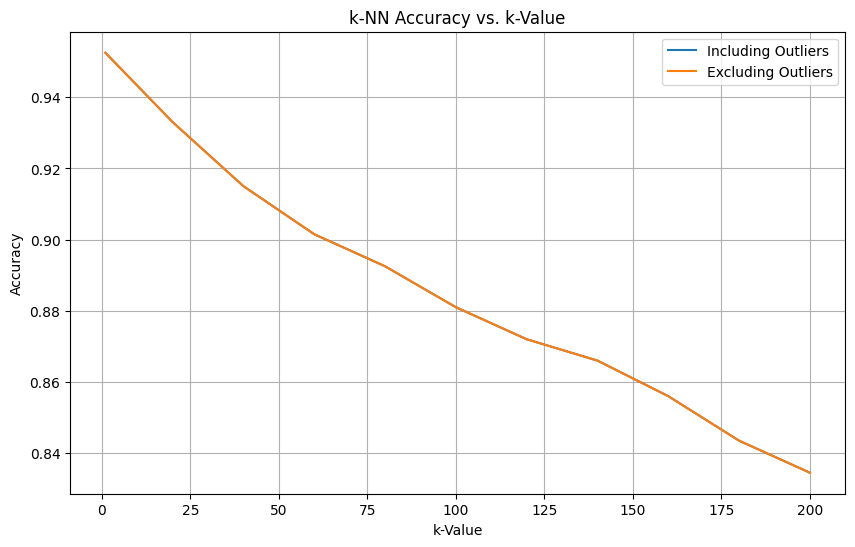

In [3]:
X_train = X_train.values # If your data is sparse, convert it to a dense array
X_test = X_test.values

# Define k-values to test
k_values = [1, 20, 40, 60, 80, 100, 120,140,160 ,180, 200]  # Adjust the range as needed

knn_accuracy_including_outliers = []
knn_accuracy_excluding_outliers = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_pred_including_outliers = knn.predict(X_test)
    knn_accuracy_including_outliers.append(accuracy_score(y_test, y_pred_including_outliers))

    # Optionally, you can remove outliers from X_train and y_train here
    # based on "rxNN at dist_perc=100" criteria.

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_excluding_outliers = knn.predict(X_test)
    knn_accuracy_excluding_outliers.append(accuracy_score(y_test, y_pred_excluding_outliers))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, knn_accuracy_including_outliers, label="Including Outliers")
plt.plot(k_values, knn_accuracy_excluding_outliers, label="Excluding Outliers")
plt.xlabel('k-Value')
plt.ylabel('Accuracy')
plt.title('k-NN Accuracy vs. k-Value')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
knn_accuracy_including_outliers

[0.9525,
 0.933,
 0.915,
 0.9015,
 0.8925,
 0.881,
 0.872,
 0.866,
 0.856,
 0.8435,
 0.8345]

In [5]:
knn_accuracy_excluding_outliers

[0.9525,
 0.933,
 0.915,
 0.9015,
 0.8925,
 0.881,
 0.872,
 0.866,
 0.856,
 0.8435,
 0.8345]

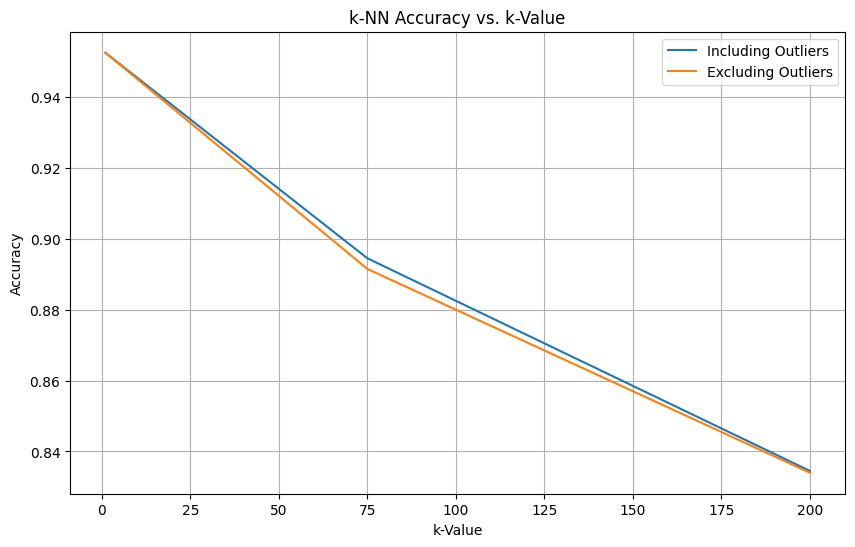

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# Define k-values to test
k_values = [1,75, 200]  # Adjust the range as needed

knn_accuracy_including_outliers = []
knn_accuracy_excluding_outliers = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_pred_including_outliers = knn.predict(X_test)
    accuracy_including_outliers = accuracy_score(y_test, y_pred_including_outliers)
    knn_accuracy_including_outliers.append(accuracy_including_outliers)

    # Determine the distance percentile threshold for outliers
    distances = knn.kneighbors(X_train, n_neighbors=k)[0].max(axis=1)
    threshold = np.percentile(distances, 95)  # 95th percentile as dist_precentile

    # Identify inliers and outliers
    inliers_mask = distances <= threshold
    outliers_mask = distances > threshold

    # Train a k-NN classifier excluding outliers
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train[inliers_mask], y_train[inliers_mask])

    y_pred_excluding_outliers = knn.predict(X_test)
    accuracy_excluding_outliers = accuracy_score(y_test, y_pred_excluding_outliers)
    knn_accuracy_excluding_outliers.append(accuracy_excluding_outliers)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, knn_accuracy_including_outliers, label="Including Outliers")
plt.plot(k_values, knn_accuracy_excluding_outliers, label="Excluding Outliers")
plt.xlabel('k-Value')
plt.ylabel('Accuracy')
plt.title('k-NN Accuracy vs. k-Value')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

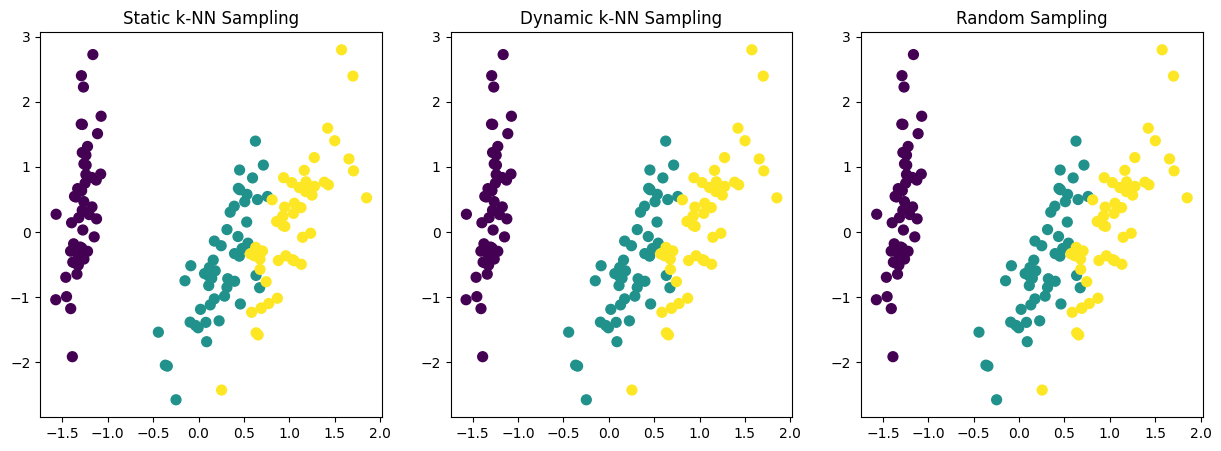

In [8]:
# Standardize the data
scaler = StandardScaler()
X_pca = scaler.fit_transform(X_pca)

# Create a grid of subplots with three columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Figure 1: Static k-NN Sampling
knn_static = KNeighborsClassifier(n_neighbors=5)
knn_static.fit(X_pca, y)

axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=50)
axes[0].set_title('Static k-NN Sampling')

# Figure 2: Dynamic k-NN Sampling
knn_dynamic = KNeighborsClassifier(n_neighbors=5)
knn_dynamic.fit(X_pca, y)

axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=50)
axes[1].set_title('Dynamic k-NN Sampling')

# Figure 3: Random Sampling
axes[2].scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=50)
axes[2].set_title('Random Sampling')

plt.show()

In [9]:
from sklearn.model_selection import train_test_split
X = iris.data
y = iris.target
X = X[:10000]  # Reduce data size to 10,000 samples
y = y[:10000]
# Convert labels to integers
y = y.astype(int)

# Split the data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.manifold import TSNE

# Define k-values to test
k_values = [1, 30, 60, 80, 85, 90, 95, 100]  # Adjust the range as needed

stat_knn_accuracy_including_outliers = []
stat_knn_accuracy_excluding_outliers = []

for k in k_values:
    # Perform t-SNE with the given perplexity
    perplexity = 30  # Adjust the perplexity as needed
    tsne = TSNE(n_components=2, perplexity=perplexity)
    X_embedded = tsne.fit_transform(X_train)

    # Define a fixed percentage (e.g., 5%) of outliers
    outlier_percentage = 0  # Adjust the percentage as needed
    n_outliers = int(X_embedded.shape[0] * outlier_percentage / 100)

    # Select the first n_outliers data points as outliers
    outliers_mask = np.zeros(X_embedded.shape[0], dtype=bool)
    outliers_mask[:n_outliers] = True

    # Train k-NN classifier including outliers
    knn_including_outliers = KNeighborsClassifier(n_neighbors=k)
    knn_including_outliers.fit(X_embedded, y_train)

    y_pred_including_outliers = knn_including_outliers.predict(X_embedded)
    accuracy_including_outliers = accuracy_score(y_train, y_pred_including_outliers)
    stat_knn_accuracy_including_outliers.append(accuracy_including_outliers)

    # Train a k-NN classifier excluding outliers
    knn_excluding_outliers = KNeighborsClassifier(n_neighbors=k)
    knn_excluding_outliers.fit(X_embedded[~outliers_mask], y_train[~outliers_mask])

    y_pred_excluding_outliers = knn_excluding_outliers.predict(X_embedded)
    accuracy_excluding_outliers = accuracy_score(y_train, y_pred_excluding_outliers)
    stat_knn_accuracy_excluding_outliers.append(accuracy_excluding_outliers)

In [11]:
# Define k-values to test
k_values = [1, 30, 60, 80, 85, 90, 95, 100]  # Adjust the range as needed

random_accuracy_including_outliers = []
random_accuracy_excluding_outliers = []

for k in k_values:
    # Manually shuffle the data to obtain a random initialization
    shuffle_indices = np.arange(X_train.shape[0])
    np.random.shuffle(shuffle_indices)
    X_shuffled = X_train[shuffle_indices]

    # Perform Lion t-SNE with the given perplexity
    perplexity = 30  # Adjust the perplexity as needed
    tsne = TSNE(n_components=2, perplexity=perplexity)
    X_embedded = tsne.fit_transform(X_shuffled)

    # Randomly select k data points for random sampling
    random_indices = np.random.choice(X_embedded.shape[0], k, replace=False)
    X_random = X_embedded[random_indices]
    y_random = y_train[random_indices]

    # Calculate accuracy including and excluding outliers
    knn_including_outliers = KNeighborsClassifier(n_neighbors=k)
    knn_including_outliers.fit(X_random, y_random)

    y_pred_including_outliers = knn_including_outliers.predict(X_random)
    accuracy_including_outliers = accuracy_score(y_random, y_pred_including_outliers)
    random_accuracy_including_outliers.append(accuracy_including_outliers)

    # Calculate accuracy excluding outliers
    distances = np.linalg.norm(X_random - np.mean(X_random, axis=0), axis=1)
    threshold = np.percentile(distances, 100)  # Adjust the percentile as needed
    outliers_mask = distances > threshold
    X_random_inliers = X_random[~outliers_mask]
    y_random_inliers = y_random[~outliers_mask]

    knn_excluding_outliers = KNeighborsClassifier(n_neighbors=k)
    knn_excluding_outliers.fit(X_random_inliers, y_random_inliers)

    y_pred_excluding_outliers = knn_excluding_outliers.predict(X_random_inliers)
    accuracy_excluding_outliers = accuracy_score(y_random_inliers, y_pred_excluding_outliers)
    random_accuracy_excluding_outliers.append(accuracy_excluding_outliers)

In [12]:
# Define k-values to test
k_values = [1, 30, 60, 80, 85, 90, 95, 100]  # Adjust the range as needed

knn_accuracy_including_outliers = []
knn_accuracy_excluding_outliers = []

for k in k_values:
    # Perform t-SNE with the given perplexity
    perplexity = 30  # Adjust the perplexity as needed
    tsne = TSNE(n_components=2, perplexity=perplexity)
    X_embedded = tsne.fit_transform(X_train)

    # Train k-NN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_embedded, y_train)

    y_pred_including_outliers = knn.predict(X_embedded)
    accuracy_including_outliers = accuracy_score(y_train, y_pred_including_outliers)
    knn_accuracy_including_outliers.append(accuracy_including_outliers)

    # Dynamic outlier detection and removal
    distances = knn.kneighbors(X_embedded, n_neighbors=k)[0].max(axis=1)
    threshold = np.percentile(distances, 100)  # Adjust the percentile as needed

    # Identify inliers and outliers
    inliers_mask = distances <= threshold
    outliers_mask = distances > threshold

    # Train a k-NN classifier excluding outliers
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_embedded[inliers_mask], y_train[inliers_mask])

    y_pred_excluding_outliers = knn.predict(X_embedded)
    accuracy_excluding_outliers = accuracy_score(y_train, y_pred_excluding_outliers)
    knn_accuracy_excluding_outliers.append(accuracy_excluding_outliers)

In [13]:
import matplotlib.pyplot as plt

# Define train sample sizes and corresponding accuracy values
train_sample_sizes1 = [20, 40, 60, 80, 100, 120,140,160]  # Replace with your actual values
  # Replace with your actual values
train_sample_sizes = train_sample_sizes1[::-1]
k_values = [1, 30, 60, 80, 85, 90, 95, 100]

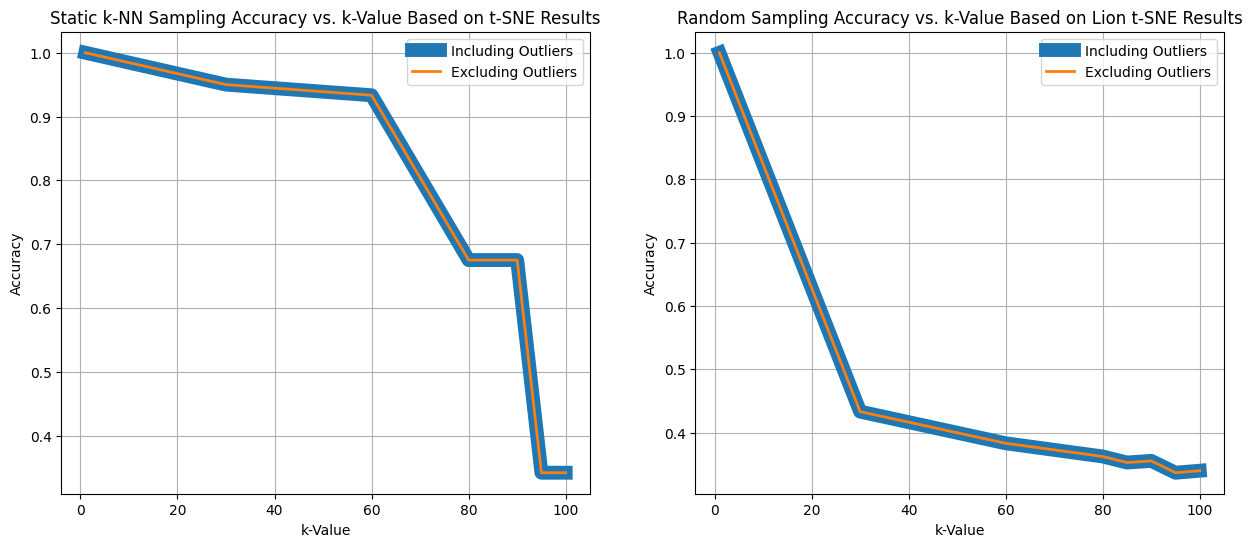

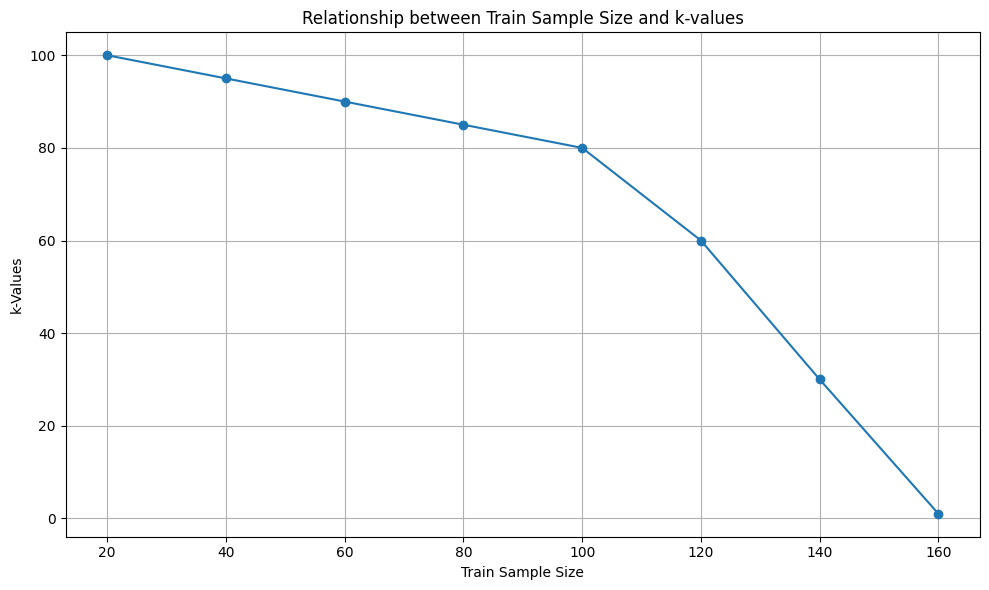

In [14]:
plt.figure(figsize=(15, 6))

# First graph
plt.subplot(1, 2, 1)
plt.plot(k_values, stat_knn_accuracy_including_outliers, label="Including Outliers", lw=10)
plt.plot(k_values, stat_knn_accuracy_excluding_outliers, label="Excluding Outliers", lw=2)
plt.xlabel('k-Value')
plt.ylabel('Accuracy')
plt.title('Static k-NN Sampling Accuracy vs. k-Value Based on t-SNE Results')
plt.legend()
plt.grid(True)

# Second graph
plt.subplot(1, 2, 2)
plt.plot(k_values, random_accuracy_including_outliers, label="Including Outliers", lw=10)
plt.plot(k_values, random_accuracy_excluding_outliers, label="Excluding Outliers", lw=2)
plt.xlabel('k-Value')
plt.ylabel('Accuracy')
plt.title('Random Sampling Accuracy vs. k-Value Based on Lion t-SNE Results')
plt.legend()
plt.grid(True)

# Create the third graph below the first two
plt.figure(figsize=(10, 6))
plt.plot(train_sample_sizes, k_values, marker='o', linestyle='-')
plt.xlabel('Train Sample Size')
plt.ylabel('k-Values')
plt.title('Relationship between Train Sample Size and k-values')
plt.grid(True)

# Display the plots
plt.tight_layout()  # Adjusts spacing
plt.show()

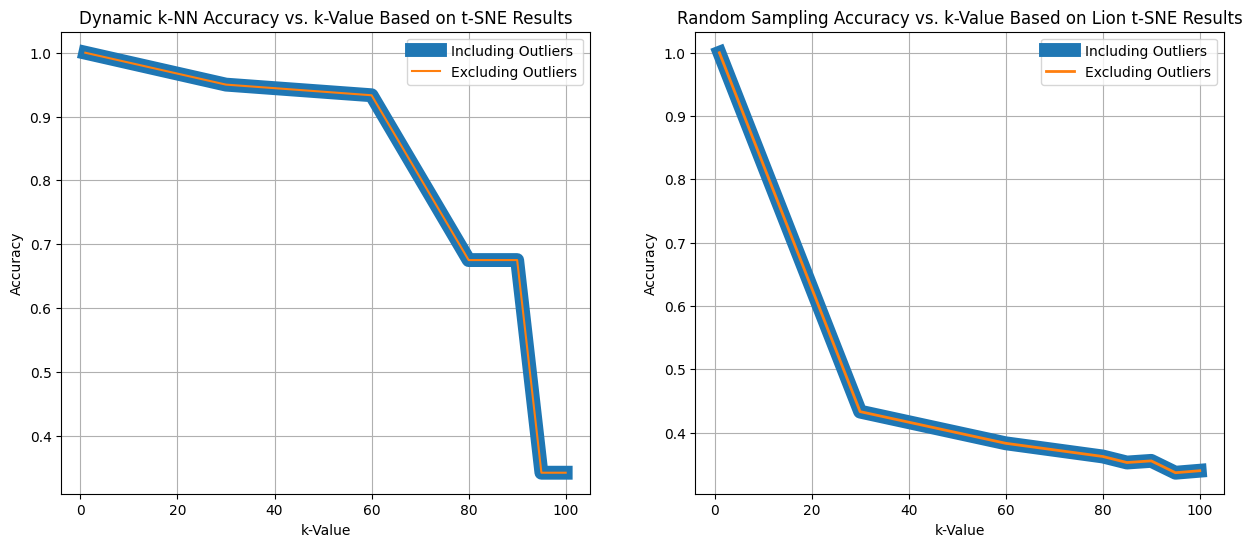

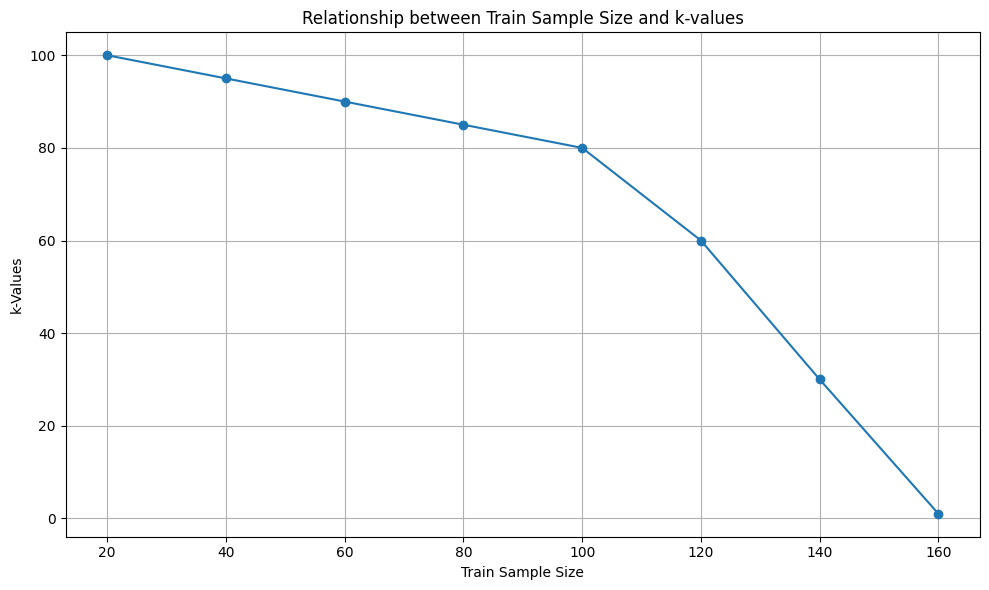

In [15]:
plt.figure(figsize=(15, 6))

# First graph
plt.subplot(1, 2, 1)
plt.plot(k_values, knn_accuracy_including_outliers, label="Including Outliers", lw=10)
plt.plot(k_values, knn_accuracy_excluding_outliers, label="Excluding Outliers")
plt.xlabel('k-Value')
plt.ylabel('Accuracy')
plt.title('Dynamic k-NN Accuracy vs. k-Value Based on t-SNE Results')
plt.legend()
plt.grid(True)

# Second graph
plt.subplot(1, 2, 2)
plt.plot(k_values, random_accuracy_including_outliers, label="Including Outliers", lw=10)
plt.plot(k_values, random_accuracy_excluding_outliers, label="Excluding Outliers", lw=2)
plt.xlabel('k-Value')
plt.ylabel('Accuracy')
plt.title('Random Sampling Accuracy vs. k-Value Based on Lion t-SNE Results')
plt.legend()
plt.grid(True)

# Create the third graph below the first two
plt.figure(figsize=(10, 6))
plt.plot(train_sample_sizes, k_values, marker='o', linestyle='-')
plt.xlabel('Train Sample Size')
plt.ylabel('k-Values')
plt.title('Relationship between Train Sample Size and k-values')
plt.grid(True)

# Display the plots
plt.tight_layout()  # Adjusts spacing
plt.show()

In [18]:
from sklearn.linear_model import LinearRegression

# Reshape the data for linear regression
X = np.array(train_sample_sizes1).reshape(-1, 1)
y =stat_knn_accuracy_excluding_outliers

# Create and fit a linear regression model
reg = LinearRegression().fit(X, y)

# Predict k-NN accuracies using the linear regression model
predicted_accuracies1 = reg.predict(X)

In [19]:
from sklearn.linear_model import LinearRegression

# Reshape the data for linear regression
X = np.array(train_sample_sizes1).reshape(-1, 1)
y =knn_accuracy_excluding_outliers

# Create and fit a linear regression model
reg = LinearRegression().fit(X, y)

# Predict k-NN accuracies using the linear regression model
predicted_accuracies2 = reg.predict(X)

In [20]:
from sklearn.linear_model import LinearRegression

# Reshape the data for linear regression
X = np.array(train_sample_sizes1).reshape(-1, 1)
y =random_accuracy_excluding_outliers

# Create and fit a linear regression model
reg = LinearRegression().fit(X, y)

# Predict k-NN accuracies using the linear regression model
predicted_accuracies3 = reg.predict(X)

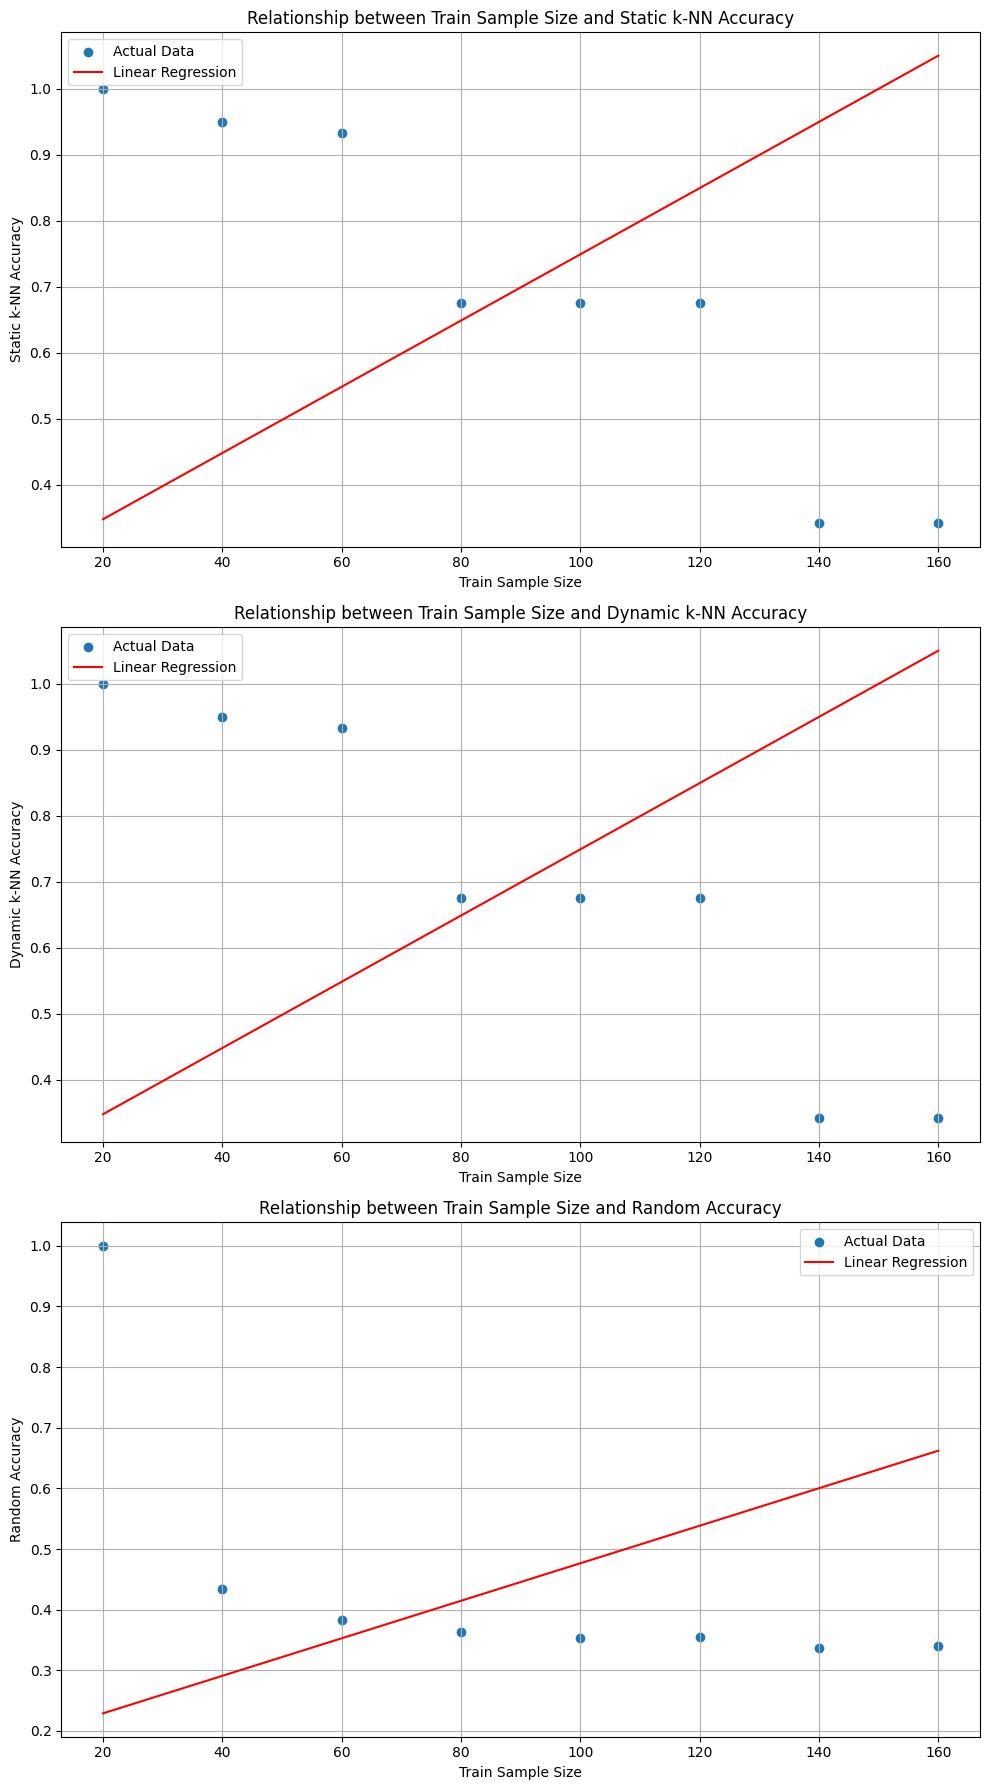

In [21]:
# Create subplots for the three graphs in a column-wise layout
fig, axs = plt.subplots(3, 1, figsize=(10, 18))

# Plot Static k-NN Accuracy vs. Train Sample Size
axs[0].scatter(train_sample_sizes1, stat_knn_accuracy_excluding_outliers, label="Actual Data")
axs[0].plot(train_sample_sizes, predicted_accuracies1, color='red', label="Linear Regression")
axs[0].set_xlabel('Train Sample Size')
axs[0].set_ylabel('Static k-NN Accuracy')
axs[0].set_title('Relationship between Train Sample Size and Static k-NN Accuracy')
axs[0].legend()
axs[0].grid(True)

# Plot Dynamic k-NN Accuracy vs. Train Sample Size
axs[1].scatter(train_sample_sizes1, knn_accuracy_excluding_outliers, label="Actual Data")
axs[1].plot(train_sample_sizes, predicted_accuracies2, color='red', label="Linear Regression")
axs[1].set_xlabel('Train Sample Size')
axs[1].set_ylabel('Dynamic k-NN Accuracy')
axs[1].set_title('Relationship between Train Sample Size and Dynamic k-NN Accuracy')
axs[1].legend()
axs[1].grid(True)

# Plot Random Accuracy vs. Train Sample Size
axs[2].scatter(train_sample_sizes1, y, label="Actual Data")
axs[2].plot(train_sample_sizes, predicted_accuracies3, color='red', label="Linear Regression")
axs[2].set_xlabel('Train Sample Size')
axs[2].set_ylabel('Random Accuracy')
axs[2].set_title('Relationship between Train Sample Size and Random Accuracy')
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()

In [22]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
X, y = mnist.data, mnist.target
X = X[:10000]  # Reduce data size to 10,000 samples
y = y[:10000]
y = y.astype(int)

<ipython-input-24-0192fbd89456>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, cmap=plt.cm.get_cmap("viridis", 7), marker='o', s=2)


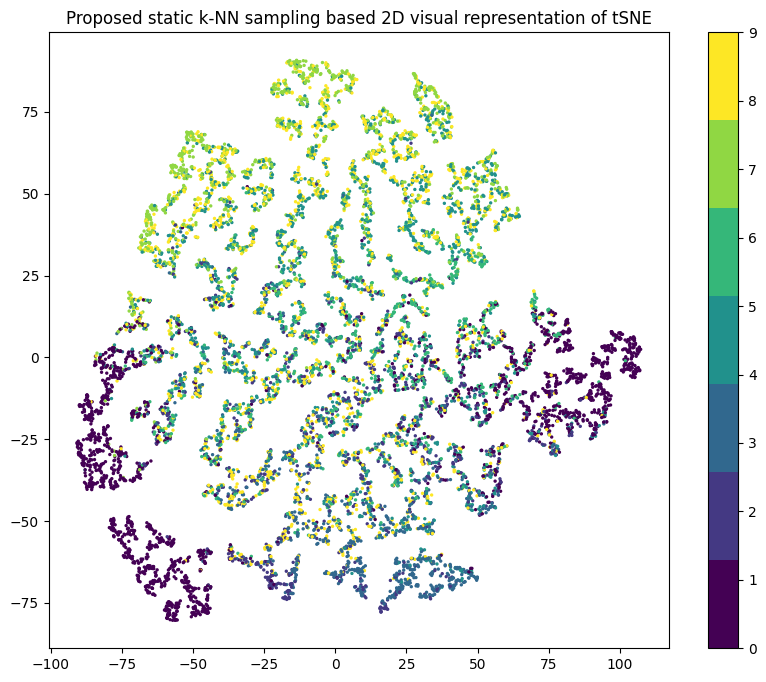

In [24]:
# Apply PCA for initial solution
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Apply t-SNE with static k-NN sampling
# Make sure to set the right parameters for your specific t-SNE implementation
tsne = TSNE(n_components=2, perplexity=30, n_jobs=15, random_state=0)
X_embedded = tsne.fit_transform(X_pca)

# Create a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, cmap=plt.cm.get_cmap("viridis", 7), marker='o', s=2)
plt.colorbar()
plt.title('Proposed static k-NN sampling based 2D visual representation of tSNE')
# Display the scatter plot
plt.show()